## Производная

In [195]:
from math import exp
from math import sin,cos,log,pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)






In [213]:
def deriv(h,x):
    return (exp(x+h)-exp(x)+sin(x+h)-sin(x))/h

In [219]:
h=0.1
x=1
for i in range(20):
    print(abs(deriv(h,x)-exp(x)-cos(x)))
    #print('1e-0',i+1)
    h *=0.1

0.0976215730820873
0.009420502471808145
0.0009387685663666545
9.384417435942538e-05
9.384135396306448e-06
9.382247587730319e-07
9.811899559508674e-08
9.57263779355344e-09
2.679831188068249e-07
1.4892284454504079e-06
3.1465250110329634e-05
0.00047555445996039225
0.0011897800769777866
0.005630672175478857
0.4051518469358286
3.258584134327185
3.258584134327185
3.258584134327185
3.258584134327185
3.258584134327185


## Интеграл

In [4]:
def f(x): 
    return x**30/(x+4)

In [5]:
def rect():
    delta=0.01
    ku=delta
    integral=0
    for i in range(100):
        integral+=delta*f(ku)
        ku+=delta
    return integral

In [6]:
def rekur():
    integral=log(5/4)
    for i in range(1,31):
        integral=1/(i)-4*integral
    return integral

In [7]:
def antirekur():
    integral=0
    for i in range(60,29,-1):
        integral=1/(4*i)-integral/4
    return integral

In [8]:
print(rect())
print(rekur())
print(antirekur())

0.007542033609231846
10.80683314070895
0.006710225065737781


## Метод Эйлера для системы

In [9]:
def F(x):
    return log(x)+sin(x)

def f(x):
    return 1/x+cos(x)



In [10]:
def line(x1,x2,h):
    x=[]
    y=[]
    yi=F(x1)
    xi=x1
    n=int((x2-x1)/h)
    for i in range(n):
        x.append(xi)
        yi+=h*f(xi)
        y.append(yi)
        xi+=h
    return x,y,yi

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


0.05097329644407389
0.0052031611451606175
0.0005213743168970275


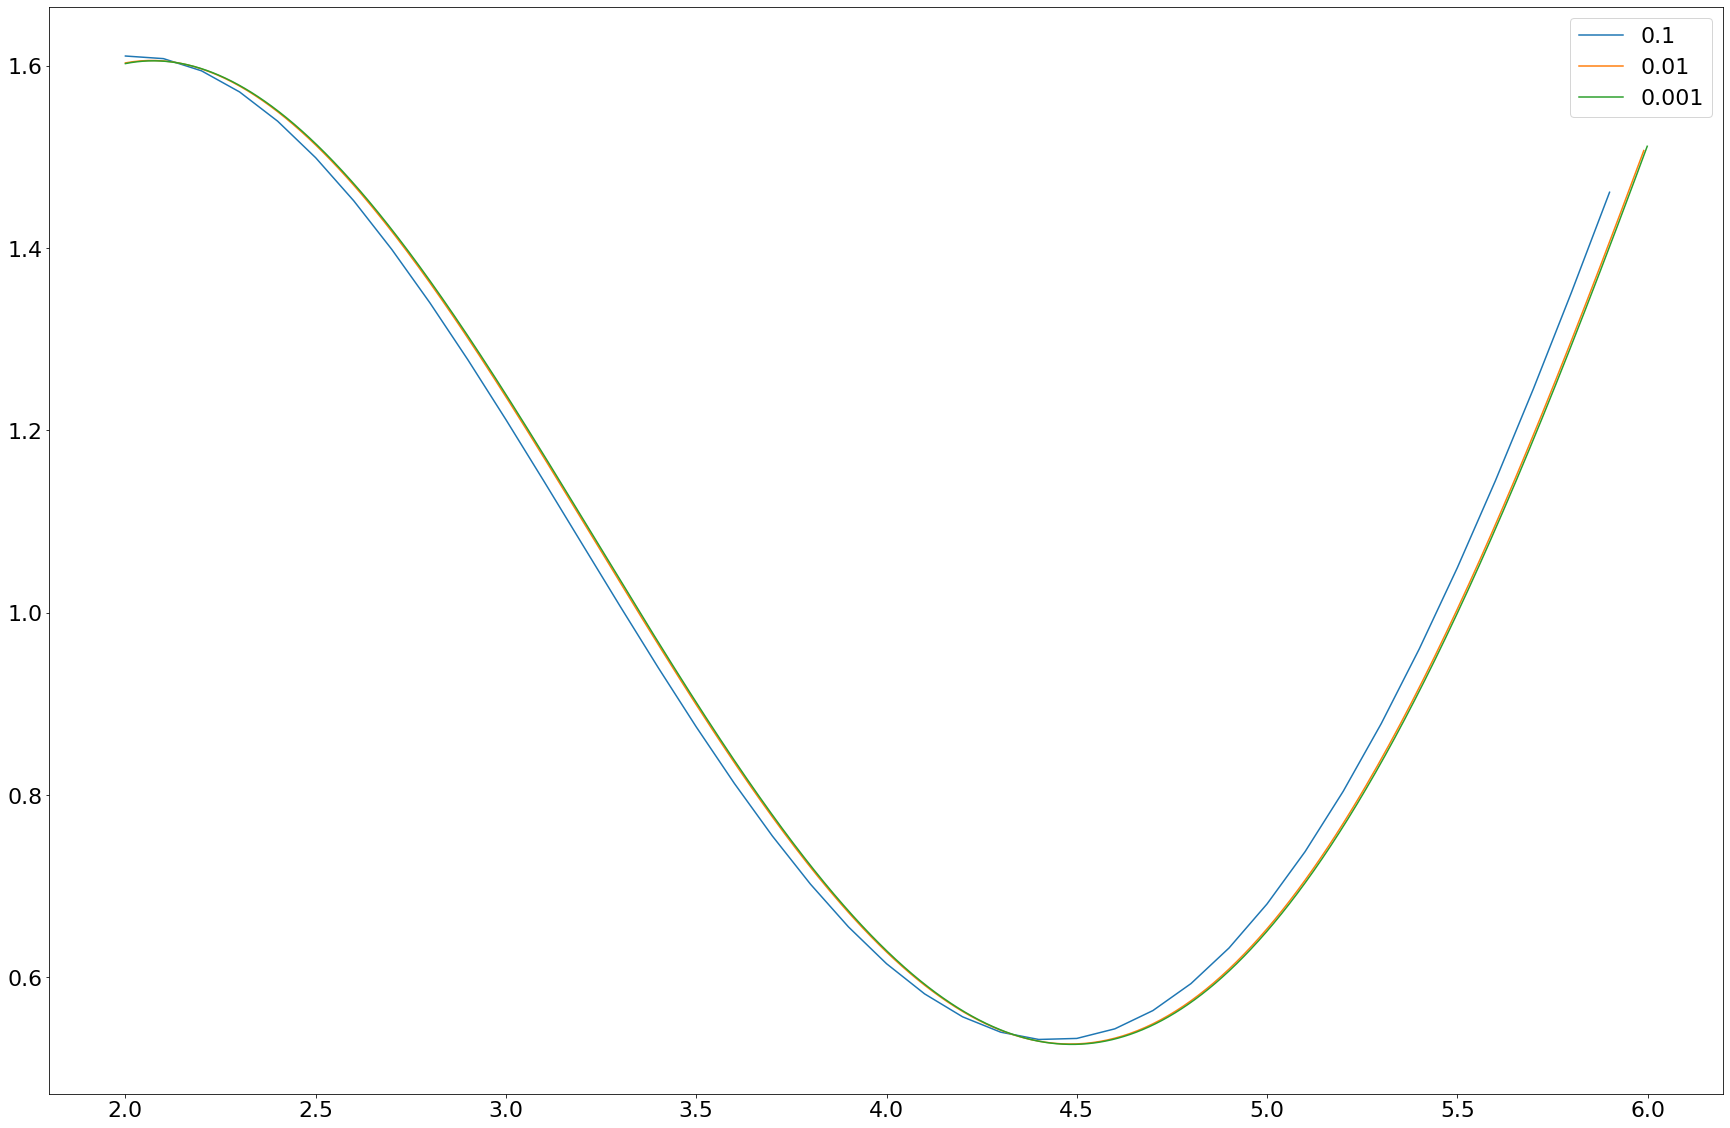

In [11]:
x1=2
x2=6
h=0.1
fig = plt.subplots(figsize = [30,20])
for i in range(3):
    lyn = line(x1,x2,h)
    x = lyn[0]
    y = lyn[1]
    Y=lyn[2]
    plt.plot(x,y, label=h)
    h/=10
    error = abs(Y-F(x2))
    print(error)
plt.legend()
plt.show()


(Заметим, что рыженькая и зелёненькая линия почти совпадают.)

## Метод Эйлера для осциллятора

In [12]:
def sol(x0,y0,h):
    yi=y0
    xi=x0
    y=[]
    x=[]
    n=int(100*pi/h)
    for i in range(n):
        x.append(xi)
        y.append(yi)
        t=xi
        xi+=yi*h
        yi-=t*h
    return x, y

## h=0.1

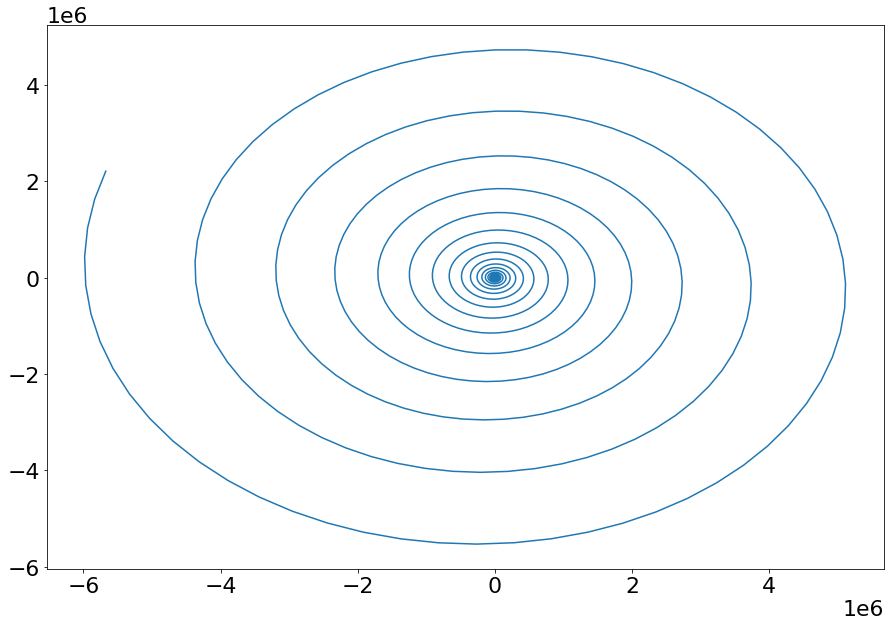

In [13]:
fig = plt.subplots(figsize = [15,10])
x0=0
y0=1
h=0.1
lyn = sol(x0,y0,h)
x = lyn[0]
y = lyn[1]
plt.plot(x,y, label=h)
plt.show()

## h=0.01

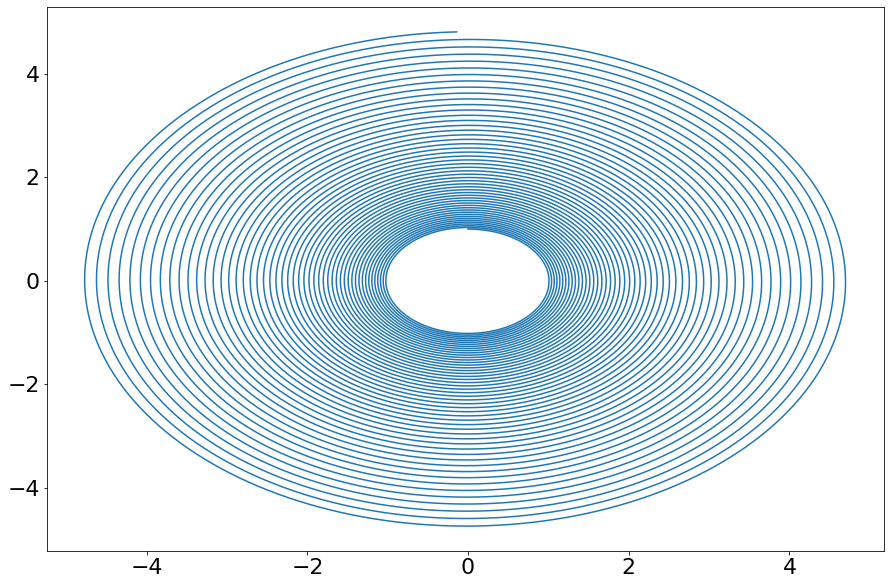

In [14]:
fig = plt.subplots(figsize = [15,10])
x0=0
y0=1
h=0.01
lyn = sol(x0,y0,h)
x = lyn[0]
y = lyn[1]
plt.plot(x,y, label=h)
plt.show()

## h=0.001

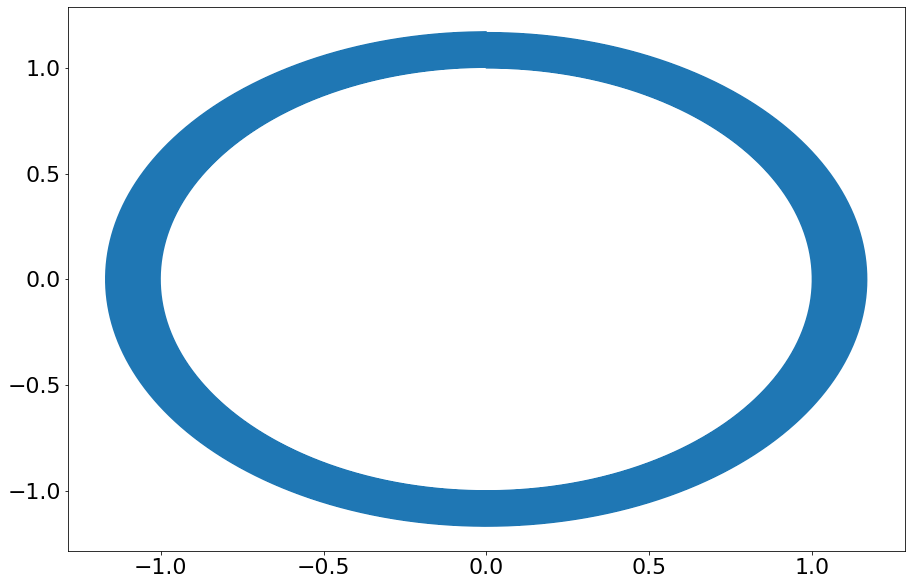

In [15]:
fig = plt.subplots(figsize = [15,10])
x0=0
y0=1
h=0.001
lyn = sol(x0,y0,h)
x = lyn[0]
y = lyn[1]
plt.plot(x,y, label=h)
plt.show()

## Метод Рунге-Кутты

In [16]:
def DP():
    c = [0, 0, 1/5, 3/10, 4/5, 8/9, 1, 1]
    b=[0, 35/384,0,500/1113,125/192,-2187/6784,11/84,0]
    a = [[], [], [0, 1/5], [0, 3/40, 9/40],[0, 44/45, -56/15, 32/9],[0, 19372/6561, -25360/2187, 64448/6561, -212/729],[0, 9017/3168, -355/33, 46732/5247, 49/176, -5103/18656],[0, 35/384, 0, 500/1113, 125/192, -2187/6784, 11/84] ]
    return a, b, c

In [17]:
def rungk(x1,x2,h):
    x=x1
    y=0
    n=int((x2-x1)/h)
    koef=DP()
    b=koef[1]
    c=koef[2]
    k = [0 for i in range(7)]
    for i in range(n):
        k[0] = f(x)
        for j in range(1, 7):
            k[j] = f(x+c[j+1]*h)
        for j in range(7):
            y += k[j]*b[j+1]*h
        x += h
    return y

In [18]:
x1=2
x2=6
h=0.1
for i in range(3):
    RK=rungk(x1,x2,h)
    err=abs(RK+F(x1)-F(x2))
    h/=10
    print(err)
    

7.1032069115517515e-12
9.969802761133906e-14
9.769962616701378e-14


## Метод Ранге-Кутта с автоматическим выбором шага+оценки погрешностей

In [19]:
def DiP():
    c = [0, 0, 1/5, 3/10, 4/5, 8/9, 1, 1]
    b=[0, 35/384,0,500/1113,125/192,-2187/6784,11/84,0]
    a = [[], [], [0, 1/5], [0, 3/40, 9/40],[0, 44/45, -56/15, 32/9],[0, 19372/6561, -25360/2187, 64448/6561, -212/729],[0, 9017/3168, -355/33, 46732/5247, 49/176, -5103/18656],[0, 35/384, 0, 500/1113, 125/192, -2187/6784, 11/84] ]
    b1 = [0,5179/57600,0,7571/16695,393/640,-92097/339200,187/2100,1/40]
    return a,b,c,b1

In [20]:
def func(t, x):
    return -x

def gunc(t, y):
    return y

In [21]:
def rungk_plus(x_0, y_0, h, tol,T):
    koef =DiP()
    a=koef[0]
    b=koef[1]
    c=koef[2]
    b_n=koef[3]
    y=y_0
    x=x_0
    Y = [y]
    X = [x]
    t=0
    delta = 0
    facmax = 1.5
    facmin = 0.7
    fac = 0.98
    n=0
    loc=[0 for i in range(3)]
    while (t<T):
        if t+h>T:
            h = T - t
            t = T
        else:
            t = t + h
        n+=1
        if t>T/4 and loc[0]==0:
            loc[0]=n
        if t>T/2 and loc[1]==0:
            loc[1]=n
        if t>3*T/4 and loc[2]==0:
            loc[2]=n
        x_1 = x
        y_1 = y
        x_n = x
        y_n = y
        
        k = [[0, 0] for i in range(7)]
        
        for i in range(7):
            x_local=x
            y_local=y
            
            for j in range(i):
                x_local+=h*a[i+1][j+1]*k[j][1]
                y_local+=h*a[i+1][j+1]*k[j][0]
                
            k[i][0] = func(t+c[i+1]*h, x_local)
            k[i][1] = gunc(t+c[i+1]*h, y_local)
        
        for i in range(7):
            x += h*k[i][1]*b[i+1]
            x_n += h*k[i][1]*b_n[i+1]
            y += h*k[i][0]*b[i+1]
            y_n += h*k[i][0]*b_n[i+1]
            
        err = ((x_n-x)**2+(y-y_n)**2)**0.5
        delta += err #Глобальная погрешность
    
        h *= min(facmax, max(facmin, fac*(tol/err)**(1/6)))

        if (err>tol):
            x = x_1
            y = y_1
            t -= h
            n -= 1
        else:
            X.append(x)
            Y.append(y)


    r = (X[len(X)-1]**2 + Y[len(Y)-1]**2)**0.5 - 1
    x_r = X[len(X)-1] - cos(t-pi/2)
    y_r = Y[len(Y)-1] - sin(t+pi/2)
    #print(r)
    print(delta)
    return X, Y, loc


## Решение

T= 314.1592653589793  tol= 1e-09
4.328727612093108e-06


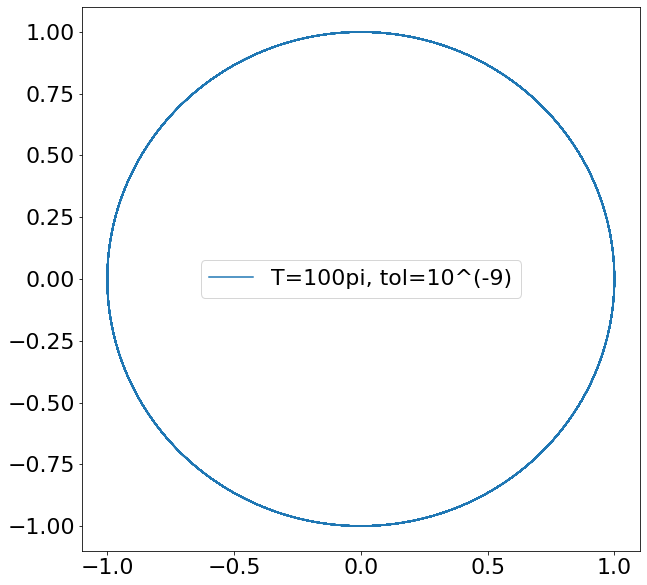

In [22]:
x_0 = 0
y_0 = 1
h=10**(-3)
tol=10**(-9)
T=100*pi
fig = plt.subplots(figsize = [10,10])

print('T=',T,' tol=',tol)
ru = rungk_plus(x_0, y_0, h, tol, T)
x = ru[0]
y = ru[1]

        
plt.plot(x,y, label='T=100pi, tol=10^(-9)')
plt.legend()
plt.show()


## Оценка глобальных погрешностей

In [23]:
x_0 = 0
y_0 = 1
h=10**(-2)
T=10*pi
k=[0 for i in range(3)]

for j in range(3): 
    for i in range(3):
        tol = 10**(-i*2-5)
        #print('T=',T,' tol=',tol)
        ru = rungk_plus(x_0, y_0, h, tol, T)
    T*=10


0.0006647665083968094
1.701684206188378e-05
4.3110265723503856e-07
0.006847084418035261
0.00017220581857298406
4.32873396400633e-06
0.06862654299343836
0.001724105679939669
4.3305447629051955e-05


## Оценка локальных погрешностей

In [24]:
x_0 = 0
y_0 = 1
T=1000*pi
k=[0 for i in range(3)]
X=[]
Y=[]

for j in range(3):
    tol=10**(-7-j*2)
    ru = rungk_plus(x_0, y_0, h, tol, T)
    x = ru[0]
    y = ru[1]
    k = ru[2]

    for i in range(3):
        X.append(x[k[i]-1])
        Y.append(y[k[i]-1])

    X.append(x[len(x)-1])
    Y.append(y[len(y)-1])

#Числа Рунге
R = [[0,0] for i in range(4)]
for i in range(4):
    R[i][0] = (X[i]-X[i+4])/(X[i+4]-X[i+8])
    R[i][1] = (Y[i]-Y[i+4])/(Y[i+4]-X[i+8])
    print(R[i][0], R[i][1])



0.0017241056799396518
4.33054476290666e-05
1.0878009967398763e-06
13.47830696787961 -0.0021551211426235357
7.509077405387993 -0.006628643892553035
-1.1137673352105308 0.00027030948757071117
249.64637661209156 -9.1806145728868e-05


## Метод стрельбы

In [184]:
def fpif(t,x,y):
    return y


def gpif(t,x,y):
    return y-y**3-x/10*(1+x**2)**0.5


In [185]:
def rungekpuf(x_0, y_0, T, tol,step):
    t= 0
    h = 0.1
    koef =DiP()
    a=koef[0]
    b=koef[1]
    c=koef[2]
    bp=koef[3]
    kx=[0 for i in range(7)]
    ky=[0 for i in range(7)]
    
    facmax=1.3
    facmin=0.7
    fac=0.9
    
    x=x_0
    y=y_0
    
    while(t<T):
        if((t+h)>T):
            h=T-t

        for i in range(7):
            x_local=x_0
            y_local=y_0
            
            for j in range(i):
                x_local+=a[i+1][j+1]*h*kx[j]
                y_local+=a[i+1][j+1]*h*ky[j]
        
            kx[i]=fpif(t+c[i+1]*h,x_local,y_local)
            ky[i]=gpif(t+c[i+1]*h,x_local,y_local)
        

        x1=x_0
        x2=x_0
        y1=y_0
        y2=y_0
        
        
        for i in range(7):
            x1+=h*kx[i]*b[i+1]
            x2+=h*kx[i]*bp[i+1]
            y1+=h*ky[i]*b[i+1]
            y2+=h*ky[i]*bp[i+1]
        
        
        err_x=abs(x2-x1)
        err_y=abs(y2-y1)
        
        err=((err_x*err_x+err_y*err_y)/2)**0.5
        if err<=tol:
            
            if (step==5):
                global xg
                xg.append(x_0)
                global yg
                yg.append(y_0)
            x_0=x1
            y_0=y1
            t+=h
            if (T-t)<10**-7:
                x=x_0
                y=y_0
                break
        h*=min(facmax, max(facmin, fac*(tol/err)**(1/6)))
    
    return(x,y,xg,yg)

In [192]:
def newton(eps,tol):
    N=0
    step=0
    x_0=0
    y_0=0
    x_d=0
    y_d=0 
    h =1
    alpha_1=1
    alpha_2=100
    alpha_1_0=0 
    alpha_2_0=0
    nev_1=0
    nev_2=0;
    delta=tol
    nev_x_1=0
    nev_x_2=0
    nev_y_1=0
    nev_y_2=0
    mat = [[0,0] for i in range(2)]

    r=[rungekpuf(alpha_1,y_0,alpha_2,tol,step)[0],rungekpuf(alpha_1,y_0,alpha_2,tol,step)[1]]
    x=r[0]
    y=r[1]
    print(x,y)
    nev_1=x-alpha_1
    nev_2=y-y_0
    #print(nev_1,' ', nev_2)

    while ((nev_1**2+nev_2**2)**0.5 > eps):
        step+=1
        print('step=',step)
        #print((nev_1**2+nev_2**2)**0.5, eps)      
        x_d=nev_1;
        y_d=nev_2;
        r=[rungekpuf(alpha_1+delta,y_0,alpha_2,tol, step)[0],rungekpuf(alpha_1+delta,y_0,alpha_2,tol, step)[1]]
        nev_x_1=r[0]-alpha_1-delta
        nev_y_1=r[1]-y_0
        #print(nev_x_1, x_d, nev_y_1, y_d)
        mat[0][0]=(nev_x_1-x_d)/delta
        mat[1][0]=(nev_y_1-y_d)/delta
        
        r=[rungekpuf(alpha_1,y_0,alpha_2+delta,tol, step)[0],rungekpuf(alpha_1,y_0,alpha_2+delta,tol, step)[1]]
        #print(r[0])
        nev_x_2=r[0]-alpha_1
        nev_y_2=r[1]-y_0
        

        #print(r[0],'\n', nev_x_2, '\n', nev_y_2,'\n')
        mat[0][1]=(nev_x_2-x_d)/delta;
        mat[1][1]=(nev_y_2-y_d)/delta;

        #print(mat_1_1, " ", mat_1_2, " " ,mat_2_1, " ", mat_2_2,'\n')

        alpha_1=alpha_1+h*(-x_d*mat[1][1]+y_d*mat[0][1])/(mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0])
        alpha_1_0=alpha_1
        alpha_2=alpha_2+h*(-y_d*mat[0][0]+x_d*mat[1][0])/(mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0])
        alpha_2_0=alpha_2

        #print(alpha_1, " ", alpha_2)
        

        print(nev_1)
        
        r=[rungekpuf(alpha_1,y_0,alpha_2,tol, step)[0],rungekpuf(alpha_1,y_0,alpha_2,tol, step)[1]]
        nev_1=r[0]-alpha_1
        nev_2=r[1]-y_0
        N+=1
        
        
        while ((nev_1**2+nev_2**2)**0.5 > (x_d**2+y_d**2)**0.5 and h>2**-30):
            h/=2;
            alpha_1=alpha_1_0+h*(-x_d*mat[1][1]+y_d*mat[0][1])/(mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0])
            alpha_2=alpha_2_0+h*(-y_d*mat[0][0]+x_d*mat[1][0])/(mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0])
            r=[rungekpuf(alpha_1,y_0,alpha_2,tol, step)[0],rungekpuf(alpha_1,y_0,alpha_2,tol, step)[1]]
            nev_1=r[0]-alpha_1
            nev_2=r[1]-y_0
            
        h=1
    print('Количество шагов = ',N,'\n')


In [193]:
xg, yg = [],[]
newton(10**-7,10**-8)
print(len(xg), len(yg))

2.9578472814294985 0.21495517583686294
step= 1
1.9578472814294985
step= 2
-0.3558317367044328
step= 3
-0.759621692335557
step= 4
-0.1859542667218692
step= 5
-0.00018997223478978142
step= 6
-5.312348125841027e-07
Количество шагов =  6 

5964 5964


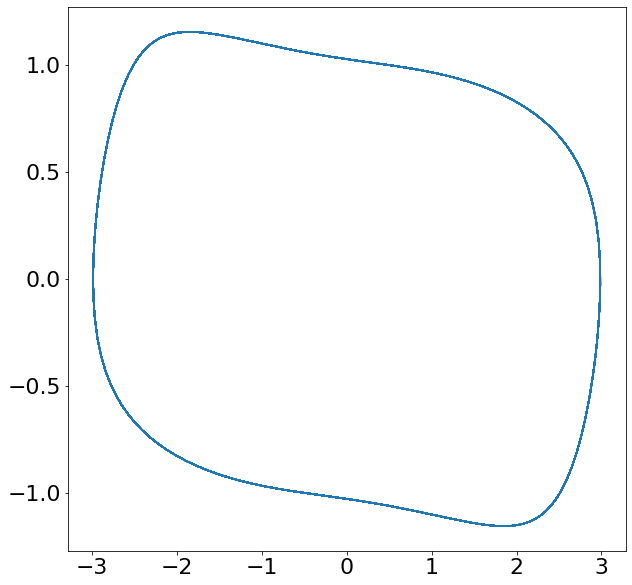

In [194]:
fig = plt.subplots(figsize = [10,10])


global xg
global yg
plt.plot(xg, yg, label='alpha=1')
plt.show()
